<a href="https://colab.research.google.com/github/dannymato/tensorflow-keras-test/blob/master/Tensorflow_Keras_Test_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 3.8MB 46.6MB/s 
     |████████████████████████████████| 450kB 51.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
tf.__version__

'2.1.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.max()

255

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
x_train.max()

1.0

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

TypeError: ignored

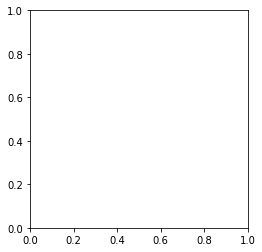

In [0]:
plt.imshow(x_test[0])

In [0]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000, 28, 28, 1))

## Building the model

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='softmax'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='softmax'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 16)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'], optimizer='adam')

In [0]:
history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.9779 - sparse_categorical_accuracy: 0.6514 - val_loss: 0.1615 - val_sparse_categorical_accuracy: 0.9541
Epoch 2/10
60000/60000 [==============================] - 25s 414us/sample - loss: 0.3796 - sparse_categorical_accuracy: 0.8776 - val_loss: 0.0998 - val_sparse_categorical_accuracy: 0.9685
Epoch 3/10
60000/60000 [==============================] - 25s 411us/sample - loss: 0.3149 - sparse_categorical_accuracy: 0.8990 - val_loss: 0.0848 - val_sparse_categorical_accuracy: 0.9743
Epoch 4/10
60000/60000 [==============================] - 25s 409us/sample - loss: 0.2758 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.0709 - val_sparse_categorical_accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 24s 408us/sample - loss: 0.2548 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.0710 - val_sparse_categorical_accuracy: 0.9785
Epoch

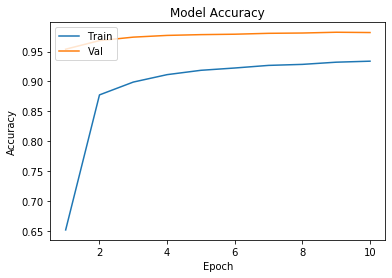

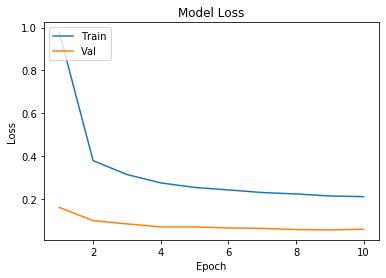

In [0]:
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
!pip install mlxtend==0.17.0

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(x_test)

In [0]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [0]:
mat

array([[ 974,    0,    1,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1126,    3,    0,    0,    1,    1,    4,    0,    0],
       [   2,    2, 1011,    6,    1,    0,    3,    6,    1,    0],
       [   0,    0,    1,  999,    0,    4,    0,    4,    1,    1],
       [   0,    0,    1,    0,  961,    0,    4,    0,    0,   16],
       [   0,    1,    0,    9,    0,  877,    1,    0,    1,    3],
       [   7,    6,    1,    0,    2,    1,  939,    0,    2,    0],
       [   1,    1,   12,    2,    0,    0,    0, 1010,    0,    2],
       [   7,    0,    3,    3,    2,    3,    1,    4,  939,   12],
       [   3,    0,    0,    3,    7,    2,    1,    8,    1,  984]])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1a7c4a49b0>)

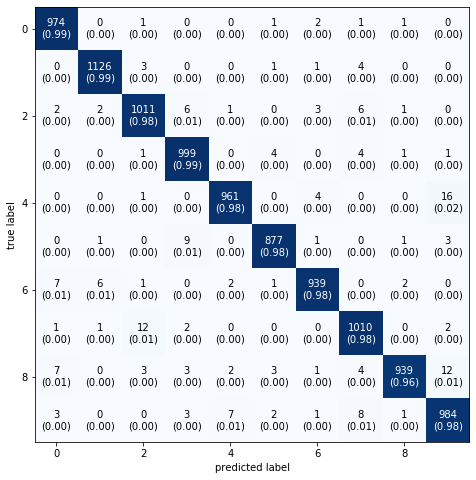

In [0]:
plot_confusion_matrix(mat, figsize=(8,8), show_normed=True)